In [ ]:
##########################################
##### Project Analysis 
# initial analysis of differential predicted open chromatin
##########################################
#Jessie Cheng (mcheng2), Chloe Chen (tcchen)
#Modified 11/2
#Analyze Open Chromatin Regions in selected species
# written portion submitted by Jessie Cheng (mcheng2)

In [ ]:
##########################################
##### Install the relevant packages #####
##########################################
#This will take several minutes

if (!requireNamespace("BiocManager", quietly = TRUE)) #Install bioconductor, repository of bioinformatics packages in R
    install.packages("BiocManager")

BiocManager::install("edgeR"); #Install the EdgeR package

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

'getOption("repos")' replaces Bioconductor standard repositories, see
'?repositories' for details

replacement repositories:
    CRAN: https://cran.rstudio.com


Bioconductor version 3.14 (BiocManager 1.30.16), R 4.1.2 (2021-11-01)

Installing package(s) 'BiocVersion', 'edgeR'

also installing the dependencies ‘limma’, ‘locfit’


Old packages: 'brio', 'cpp11', 'credentials', 'devtools', 'digest', 'dtplyr',
  'fs', 'glue', 'openssl', 'pkgbuild', 'pkgload', 'readr', 'remotes',
  'sessioninfo', 'stringi', 'testthat', 'usethis', 'vroom', 'withr', 'xml2',
  'Matrix', 'nlme'



In [ ]:
install.packages("gplots");


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘bitops’, ‘gtools’, ‘caTools’




In [ ]:
install.packages("ggplot2");
install.packages("ape");

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
##########################################
##### Load the libraries #####
##########################################
library(edgeR);
library(gplots);
library(ggplot2);
library(ape);



Loading required package: limma


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess




In [ ]:
##########################################
##### Read in the relevant datasets #####
##########################################
#Download matrix of predicted peaks for D1 neurons
peakURL_D1 <- "http://www.andrew.cmu.edu/user/apfennin/2021_Fall_GEB/project/Corces2020.MSN_D1.calibPeaks.avgCNN.predictions.txt.gz";
system(paste("wget ",peakURL_D1));

In [ ]:
peakURL_D2 <- "http://www.andrew.cmu.edu/user/apfennin/2021_Fall_GEB/project/Corces2020.MSN_D2.calibPeaks.avgCNN.predictions.txt.gz";
system(paste("wget ",peakURL_D2));

In [ ]:
##### Read the matrix of predicted peaks #####
peakPredD1 <- read.delim(file="Corces2020.MSN_D1.calibPeaks.avgCNN.predictions.txt.gz",stringsAsFactors=F,header=T)
dim(peakPredD1)
# Subset data frame with only my species of interest
peakPredsubD1 <- peakPredD1[,c("name", "Canis_lupus_familiaris", "Canis_lupus", "Eulemur_flavifrons", "Nomascus_leucogenys", "Cavia_aperea", "Castor_canadensis")] 
peakPredD1Human <- peakPredD1[,c("name", "Homo_sapiens")] 
peakPredD1Human
write.csv(peakPredD1Human,"D1PeaksHuman.csv", row.names = FALSE)
rownames(peakPredsubD1) <- peakPredsubD1$name
#peakPredsubD1$name <- NULL
peakPredsubD1M <- as.matrix(peakPredsubD1) #Change data frame to matrix 
peakPredsubD1M
dim(peakPredsubD1M)

[1] 47199   242

name,Homo_sapiens
<chr>,<dbl>
hg38:chr22:21825556-21826056:250,0.5362953
hg38:chr8:41731592-41732092:250,0.4423054
hg38:chr8:41767708-41768208:250,0.2817274
hg38:chr8:41822712-41823212:250,0.6822142
hg38:chr8:41834624-41835124:250,0.2278489
hg38:chr8:42005314-42005814:250,0.1136932
hg38:chr8:42015612-42016112:250,0.4462152
hg38:chr8:42017819-42018319:250,0.4970318
hg38:chr8:42423772-42424272:250,0.6530392


,name,Canis_lupus_familiaris,Canis_lupus,Eulemur_flavifrons,Nomascus_leucogenys,Cavia_aperea,Castor_canadensis
hg38:chr22:21825556-21826056:250,hg38:chr22:21825556-21826056:250,7.594414e-01,7.594414e-01,6.443164e-01,4.437481e-01,4.039781e-02,4.334284e-01
hg38:chr8:41731592-41732092:250,hg38:chr8:41731592-41732092:250,1.358855e-01,1.358855e-01,3.152307e-01,NA,1.147945e-01,7.471612e-02
hg38:chr8:41767708-41768208:250,hg38:chr8:41767708-41768208:250,1.904358e-01,1.904358e-01,2.005022e-01,3.318722e-01,NA,4.046279e-01
hg38:chr8:41822712-41823212:250,hg38:chr8:41822712-41823212:250,2.328271e-02,2.328271e-02,2.048966e-01,2.425521e-01,4.137802e-02,8.145644e-02
hg38:chr8:41834624-41835124:250,hg38:chr8:41834624-41835124:250,8.676498e-02,8.707336e-02,6.575107e-02,1.620428e-01,6.058790e-01,1.039021e-01
hg38:chr8:42005314-42005814:250,hg38:chr8:42005314-42005814:250,9.706268e-02,9.706268e-02,1.342555e-01,6.863663e-02,3.450555e-02,6.289855e-02
hg38:chr8:42015612-42016112:250,hg38:chr8:42015612-42016112:250,4.779894e-03,4.779894e-03,NA,2.691719e-01,NA,3.898807e-03
hg38:chr8:42017819-42018319:250,hg38:chr8:42017819-42018319:250,NA,NA,9.174312e-03,2.017137e-01,NA,NA
hg38:chr8:42423772-42424272:250,hg38:chr8:42423772-42424272:250,NA,NA,7.762371e-02,NA,1.455224e-01,NA
hg38:chr8:42673983-42674483:250,hg38:chr8:42673983-42674483:250,1.387711e-02,1.387711e-02,NA,5.105455e-01,NA,1.607983e-03


[1] 47199     7

In [ ]:
##### Read the matrix of predicted peaks #####
peakPredD2 <- read.delim(file="Corces2020.MSN_D2.calibPeaks.avgCNN.predictions.txt.gz",stringsAsFactors=F,header=T)
dim(peakPredD2)
# Subset data frame with only my species of interest
peakPredsubD2 <- peakPredD2[,c("name", "Canis_lupus_familiaris", "Canis_lupus", "Eulemur_flavifrons", "Nomascus_leucogenys", "Cavia_aperea", "Castor_canadensis")] 
peakPredD2Human <- peakPredD2[,c("name", "Homo_sapiens")] 
write.csv(peakPredD2Human,"D2PeaksHuman.csv", row.names = FALSE)
rownames(peakPredsubD2) <- peakPredsubD2$name
#peakPredsubD2$name <- NULL
peakPredsubD2M <- as.matrix(peakPredsubD2) #Change data frame to matrix 
peakPredsubD2M
dim(peakPredsubD2M)

[1] 46902   242

,name,Canis_lupus_familiaris,Canis_lupus,Eulemur_flavifrons,Nomascus_leucogenys,Cavia_aperea,Castor_canadensis
hg38:chr8:42005238-42005738:250,hg38:chr8:42005238-42005738:250,3.023538e-01,3.023538e-01,9.692722e-02,0.2020017231,3.827950e-02,2.718919e-01
hg38:chr8:42015658-42016158:250,hg38:chr8:42015658-42016158:250,4.210851e-02,4.210851e-02,NA,0.5755113328,1.489486e-01,2.001723e-02
hg38:chr8:42423796-42424296:250,hg38:chr8:42423796-42424296:250,NA,NA,1.066593e-01,NA,7.988811e-02,NA
hg38:chr8:42673983-42674483:250,hg38:chr8:42673983-42674483:250,1.407162e-02,1.407162e-02,NA,0.4375711292,NA,2.063413e-03
hg38:chr3:166595421-166595921:250,hg38:chr3:166595421-166595921:250,7.987747e-03,7.987747e-03,1.516077e-01,0.5422840064,NA,NA
hg38:chr3:166680958-166681458:250,hg38:chr3:166680958-166681458:250,7.498484e-03,7.498484e-03,2.063413e-03,0.7273317095,NA,NA
hg38:chr3:166695230-166695730:250,hg38:chr3:166695230-166695730:250,5.113435e-01,5.113435e-01,6.543039e-01,0.8596453908,8.522745e-02,NA
hg38:chr3:167032217-167032717:250,hg38:chr3:167032217-167032717:250,3.184356e-01,3.184356e-01,4.272222e-01,0.4179155277,2.699029e-01,NA
hg38:chr3:167067322-167067822:250,hg38:chr3:167067322-167067822:250,6.275327e-02,6.275327e-02,8.133462e-02,0.1393335390,2.269754e-02,NA
hg38:chr3:167105640-167106140:250,hg38:chr3:167105640-167106140:250,3.097246e-02,3.097246e-02,2.104894e-02,0.6252353248,NA,NA


[1] 46902     7

In [ ]:
# foreground species
foreground_species <- c("Canis_lupus", "Nomascus_leucogenys", "Castor_canadensis")
# background species
background_species <- c("Canis_lupus_familiaris", "Eulemur_flavifrons", "Cavia_aperea")
# human
human <- c("Homo_sapiens")
# all species
all_species <- c("Canis_lupus_familiaris", "Canis_lupus", "Eulemur_flavifrons", "Nomascus_leucogenys", "Cavia_aperea", "Castor_canadensis")

In [ ]:
## PERFORM P-TEST FOR EACH OPEN REGION

diffPvaluesD1 <- rep(NA,length(peakPredsubD1$name));
names(diffPvaluesD1) <- peakPredsubD1$name;
diffMeansD1 <- diffPvaluesD1;

for (curPeak in peakPredsubD1$name) {
  curForegroundValuesD1 <- peakPredsubD1[curPeak,foreground_species];
  curBackgroundValuesD1 <- peakPredsubD1[curPeak,background_species];
  if(length(which(!is.na(curForegroundValuesD1))) > 1 && length(which(!is.na(curBackgroundValuesD1))) > 1) { #Ensure there are enough values
    if(sd(curForegroundValuesD1,na.rm=T) > 0 && sd(curBackgroundValuesD1,na.rm=T) > 0) { #Ensure that standard deviation greater than 0
      curTtest <- t.test(x=curForegroundValuesD1,y=curBackgroundValuesD1); #Apply the t-test
      diffPvaluesD1[curPeak] <- curTtest$p.value #Store the results
      diffMeansD1[curPeak] <- mean(as.numeric(curForegroundValuesD1),na.rm=T) - mean(as.numeric(curBackgroundValuesD1),na.rm=T);
    }
  }
}


In [ ]:
diffPvaluesD2 <- rep(NA,length(peakPredsubD2$name));
names(diffPvaluesD2) <- peakPredsubD2$name;
diffMeansD2 <- diffPvaluesD2;

for (curPeak in peakPredsubD2$name) {
  curForegroundValuesD2 <- peakPredsubD2[curPeak,foreground_species];
  curBackgroundValuesD2 <- peakPredsubD2[curPeak,background_species];
  if(length(which(!is.na(curForegroundValuesD2))) > 1 && length(which(!is.na(curBackgroundValuesD2))) > 1) { #Ensure there are enough values
    if(sd(curForegroundValuesD2,na.rm=T) > 0 && sd(curBackgroundValuesD2,na.rm=T) > 0) { #Ensure that standard deviation greater than 0
      curTtest <- t.test(x=curForegroundValuesD2,y=curBackgroundValuesD2); #Apply the t-test
      diffPvaluesD2[curPeak] <- curTtest$p.value #Store the results
      diffMeansD2[curPeak] <- mean(as.numeric(curForegroundValuesD2),na.rm=T) - mean(as.numeric(curBackgroundValuesD2),na.rm=T);
    }
  }
}

,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr2:80409766-80410266:250,hg38:chr2:80409766-80410266:250,0.663573686,0.0001571446,1
hg38:chr4:100357450-100357950:250,hg38:chr4:100357450-100357950:250,0.548252328,0.0040762385,1
hg38:chr9:88813536-88814036:250,hg38:chr9:88813536-88814036:250,0.174658854,0.0049897579,1
hg38:chr11:131796444-131796944:250,hg38:chr11:131796444-131796944:250,0.064440455,0.0060314575,1
hg38:chr2:223784273-223784773:250,hg38:chr2:223784273-223784773:250,0.420955538,0.0063789541,1
hg38:chr19:5247907-5248407:250,hg38:chr19:5247907-5248407:250,0.321012809,0.0064701697,1
hg38:chr7:134480663-134481163:250,hg38:chr7:134480663-134481163:250,0.333331498,0.0066492816,1
hg38:chr3:60461101-60461601:250,hg38:chr3:60461101-60461601:250,0.337681862,0.0068421195,1
hg38:chr2:175679181-175679681:250,hg38:chr2:175679181-175679681:250,-0.318578808,0.0078217441,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16100 rows containing non-finite values (stat_bin).”


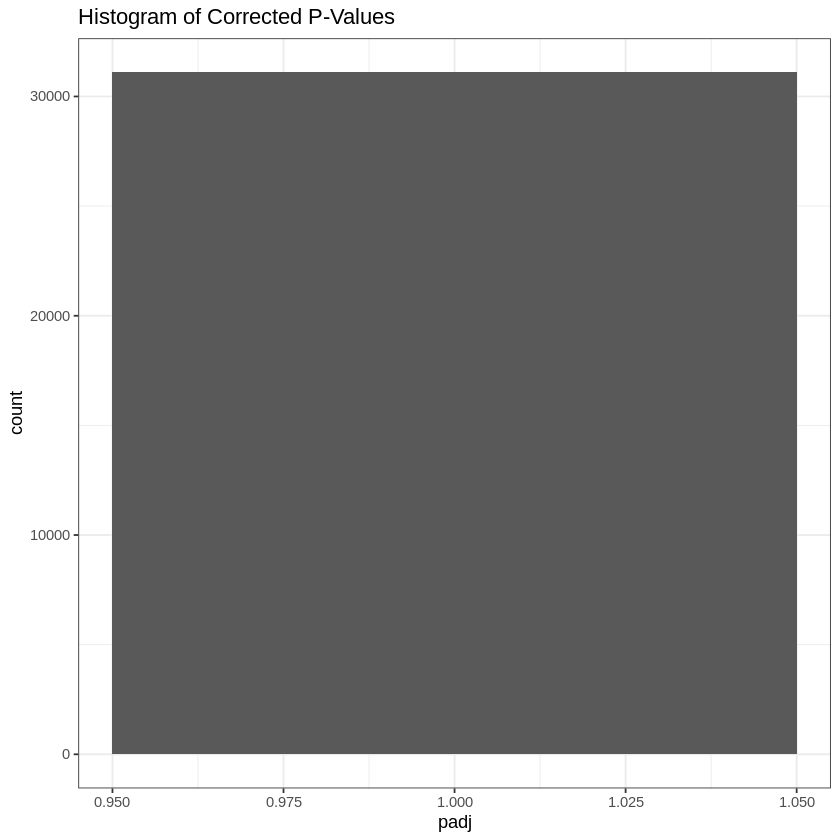

In [ ]:
# P-value correction for multiple hypotheses
diffResultsD1 <- data.frame(id=peakPredsubD1$name, meanDiff=diffMeansD1, pvalue=diffPvaluesD1, padj = p.adjust(diffPvaluesD1))
diffResultsSortD1 <- diffResultsD1[order(diffResultsD2$pvalue),]
diffResultsSortD1 <- diffResultsSortD1[order(diffResultsSortD1$meanDiff),]
diffResultsSortD1[1:20,]
D1Top1000 <- diffResultsSortD1[1:47199,]
write.csv(D1Top1000,"D1OrderedPeaks.csv", row.names = FALSE)
D1Bottom1000 <- tail(diffResultsSortD1, n=47199)

## Plot a histogram of corrected p-values
curPD1 <- ggplot(diffResultsSortD1, aes(x = padj)) +
  geom_histogram() +
  ggtitle("Histogram of Corrected P-Values") +
  theme_bw();

print(curPD1);

,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr18:37456815-37457315:250,hg38:chr18:37456815-37457315:250,0.02890196,0.0003438016,1
hg38:chr18:7721492-7721992:250,hg38:chr18:7721492-7721992:250,0.03390804,0.0010056511,1
hg38:chr6:150310468-150310968:250,hg38:chr6:150310468-150310968:250,0.12621917,0.0016425983,1
hg38:chr4:100357446-100357946:250,hg38:chr4:100357446-100357946:250,0.57479871,0.0052850969,1
hg38:chr7:111635557-111636057:250,hg38:chr7:111635557-111636057:250,0.16866272,0.0067510423,1
hg38:chrX:46691265-46691765:250,hg38:chrX:46691265-46691765:250,0.38048692,0.0109862973,1
hg38:chr1:190148987-190149487:250,hg38:chr1:190148987-190149487:250,0.20724534,0.0142214437,1
hg38:chr1:68015487-68015987:250,hg38:chr1:68015487-68015987:250,-0.03535987,0.0146629536,1
hg38:chr9:125910287-125910787:250,hg38:chr9:125910287-125910787:250,-0.01959178,0.0157059797,1


`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16130 rows containing non-finite values (stat_bin).”


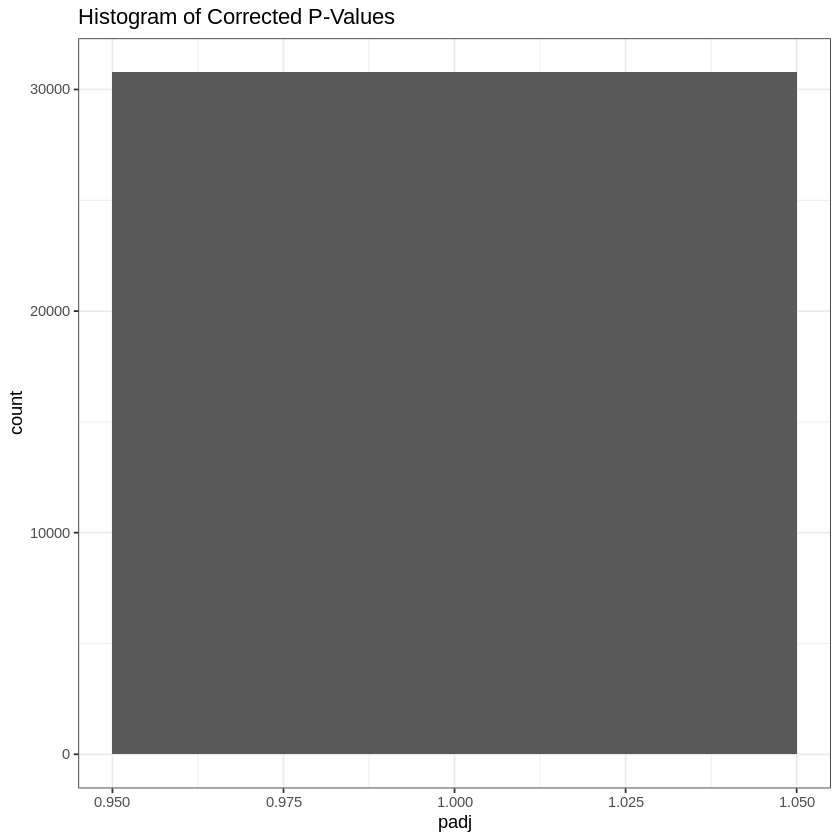

In [ ]:
# P-value correction for multiple hypotheses
diffResultsD2 <- data.frame(id=peakPredsubD2$name, meanDiff=diffMeansD2, pvalue=diffPvaluesD2, padj = p.adjust(diffPvaluesD2))
diffResultsSortD2 <- diffResultsD2[order(diffResultsD2$pvalue),]
diffResultsSortD2 <- diffResultsSortD2[order(diffResultsSortD2$meanDiff),]
diffResultsSortD2[1:20,]
D2Top1000 <- diffResultsSortD2[1:47199,]
write.csv(D2Top1000,"D2OrderedPeaks.csv", row.names = FALSE)
D2Bottom1000 <- tail(diffResultsSortD2, n=47199)

## Plot a histogram of corrected p-values
curPD2 <- ggplot(diffResultsSortD2, aes(x = padj)) +
  geom_histogram() +
  ggtitle("Histogram of Corrected P-Values") +
  theme_bw();

print(curPD2);

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16100 rows containing non-finite values (stat_bin).”


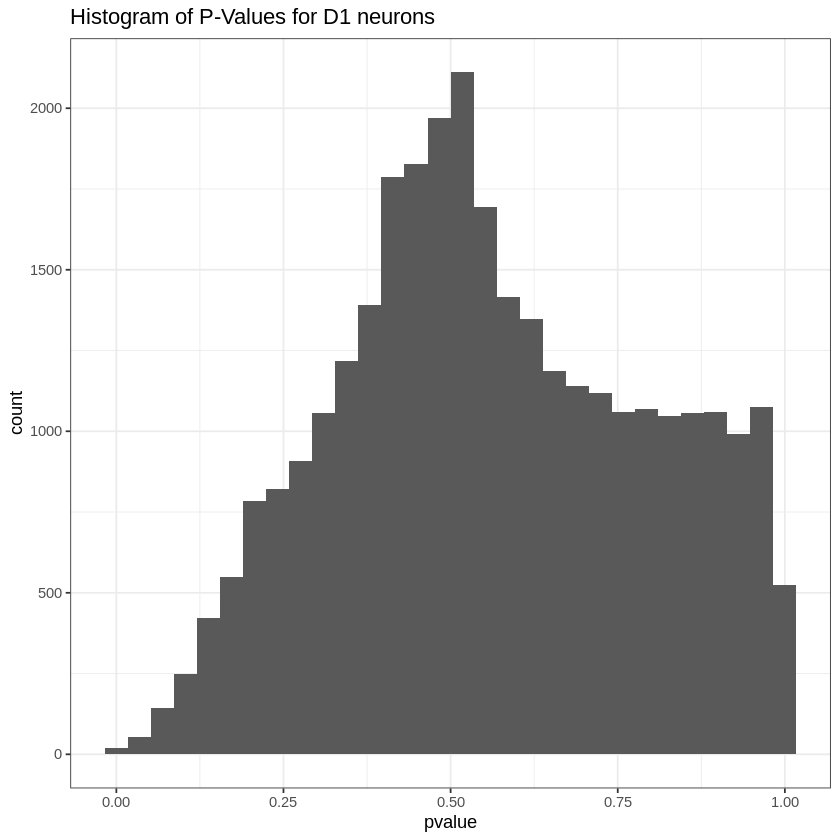

In [ ]:
# Plot histogram of p-values
diffResultsSortD1_pval <- diffResultsD1[order(diffResultsD1$pvalue),]

curPvalD1 <- ggplot(diffResultsSortD1_pval, aes(x = pvalue)) +
  geom_histogram() +
  ggtitle("Histogram of P-Values for D1 neurons") +
  theme_bw();

print(curPvalD1);

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16130 rows containing non-finite values (stat_bin).”


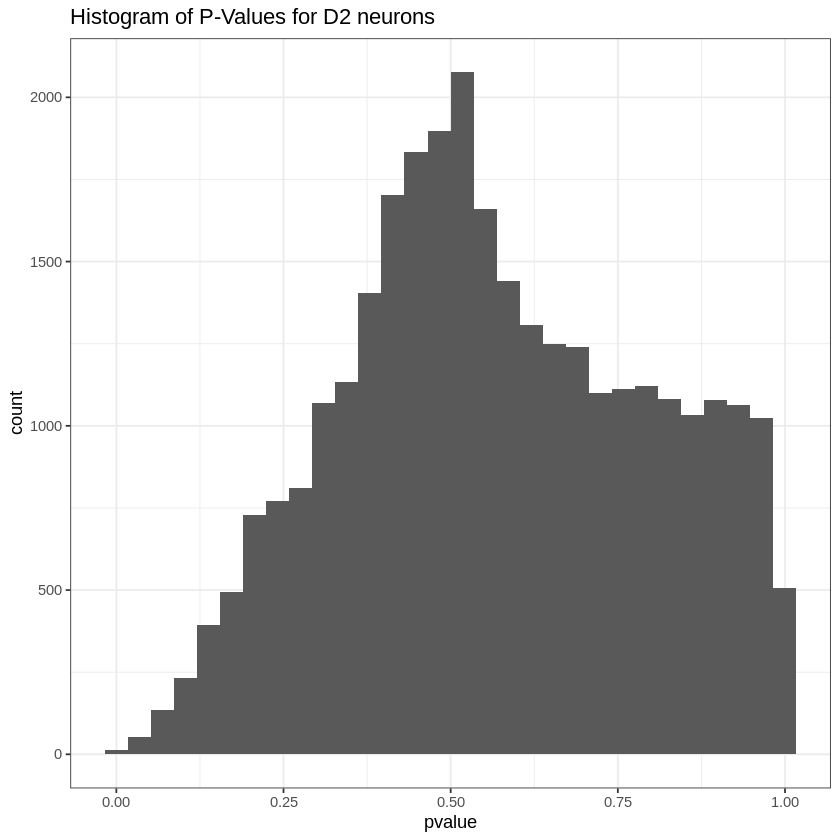

In [ ]:
# Plot histogram of p-values
diffResultsSortD2_pval <- diffResultsD2[order(diffResultsD2$pvalue),]

curPvalD2 <- ggplot(diffResultsSortD2_pval, aes(x = pvalue)) +
  geom_histogram() +
  ggtitle("Histogram of P-Values for D2 neurons") +
  theme_bw();

print(curPvalD2);

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16100 rows containing non-finite values (stat_bin).”


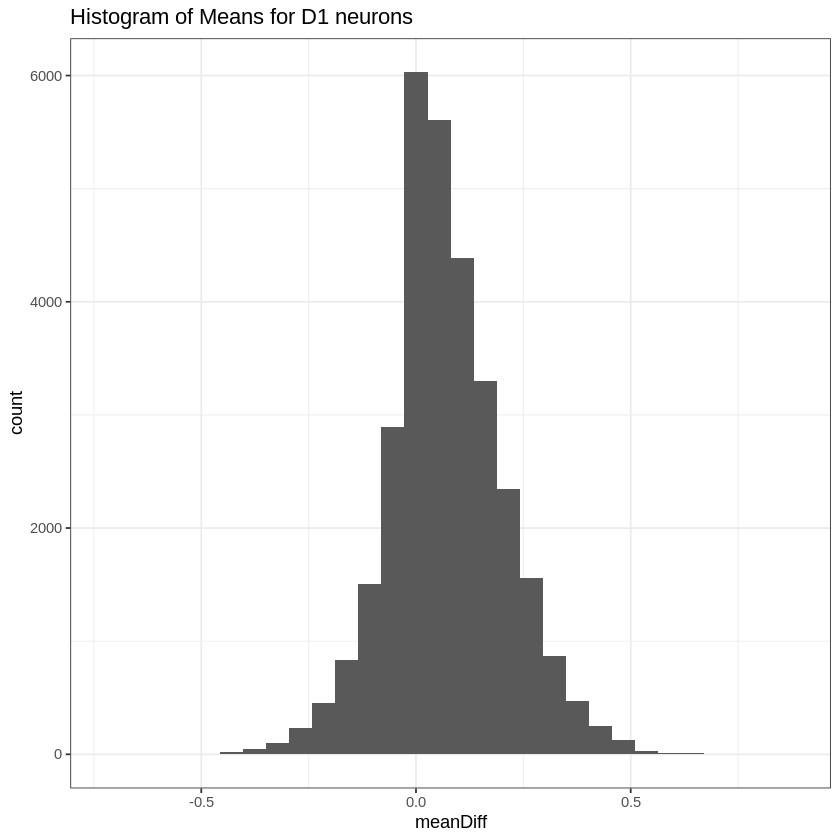

In [ ]:
# Plot histogram of means 
diffResultsSortD1_means <- diffResultsD1[order(diffResultsD1$meanDiff),]

curMeanD1 <- ggplot(diffResultsSortD1_means, aes(x = meanDiff)) +
  geom_histogram() +
  ggtitle("Histogram of Means for D1 neurons") + 
  theme_bw();

print(curMeanD1);

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

Warning message:
“Removed 16130 rows containing non-finite values (stat_bin).”


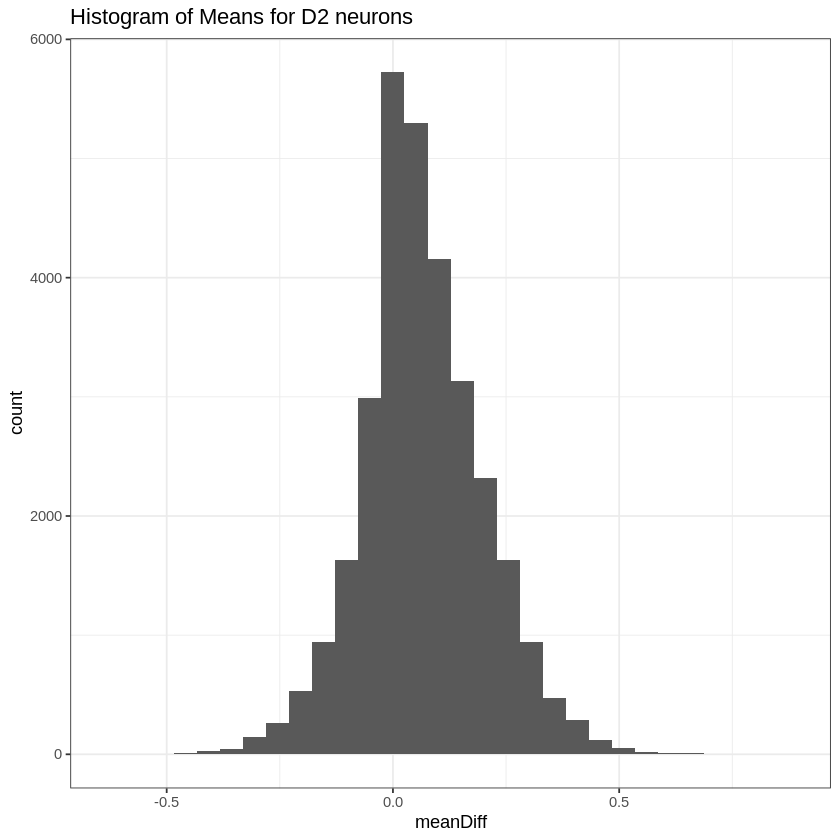

In [ ]:
# Plot histogram of means 
diffResultsSortD2_means <- diffResultsD2[order(diffResultsD2$meanDiff),]

curMeanD2 <- ggplot(diffResultsSortD2_means, aes(x = meanDiff)) +
  geom_histogram() +
  ggtitle("Histogram of Means for D2 neurons") + 
  theme_bw();

print(curMeanD2);

In [ ]:
# How many regions significantly positively/negatively associated at adjusted p-value of <= 0.1?
adjThresh <- 0.1; # set threshold 
hgPeakD1 <- diffResultsSortD1[which(diffResultsSortD1$padj <= adjThresh),"id"]
length(hgPeakD1)


[1] 0

In [ ]:
adjThresh <- 0.1; # set threshold 
hgPeakD2 <- diffResultsSortD2[which(diffResultsSortD2$padj <= adjThresh),"id"]
length(hgPeakD2)

[1] 0

In [ ]:
# Find peak that is most positively and most negatively associated with the trait
# Based on un-adjusted p-value
diffResultsSortD1_unadj <- diffResultsD1[order(diffResultsD1$pvalue),]
diffResultsSortD1_unadj[1:20, ]
# identify the top two positive/negative peaks after printing results

,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr2:80409766-80410266:250,hg38:chr2:80409766-80410266:250,0.663573686,0.0001571446,1
hg38:chr4:100357450-100357950:250,hg38:chr4:100357450-100357950:250,0.548252328,0.0040762385,1
hg38:chr9:88813536-88814036:250,hg38:chr9:88813536-88814036:250,0.174658854,0.0049897579,1
hg38:chr11:131796444-131796944:250,hg38:chr11:131796444-131796944:250,0.064440455,0.0060314575,1
hg38:chr2:223784273-223784773:250,hg38:chr2:223784273-223784773:250,0.420955538,0.0063789541,1
hg38:chr19:5247907-5248407:250,hg38:chr19:5247907-5248407:250,0.321012809,0.0064701697,1
hg38:chr7:134480663-134481163:250,hg38:chr7:134480663-134481163:250,0.333331498,0.0066492816,1
hg38:chr3:60461101-60461601:250,hg38:chr3:60461101-60461601:250,0.337681862,0.0068421195,1
hg38:chr2:175679181-175679681:250,hg38:chr2:175679181-175679681:250,-0.318578808,0.0078217441,1


In [ ]:
# Find peak that is most positively and most negatively associated with the trait
# Based on un-adjusted p-value
diffResultsSortD2_unadj <- diffResultsD2[order(diffResultsD2$pvalue),]
diffResultsSortD2_unadj[1:20, ]
# identify the top two positive/negative peaks after printing results

,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr18:37456815-37457315:250,hg38:chr18:37456815-37457315:250,0.02890196,0.0003438016,1
hg38:chr18:7721492-7721992:250,hg38:chr18:7721492-7721992:250,0.03390804,0.0010056511,1
hg38:chr6:150310468-150310968:250,hg38:chr6:150310468-150310968:250,0.12621917,0.0016425983,1
hg38:chr4:100357446-100357946:250,hg38:chr4:100357446-100357946:250,0.57479871,0.0052850969,1
hg38:chr7:111635557-111636057:250,hg38:chr7:111635557-111636057:250,0.16866272,0.0067510423,1
hg38:chrX:46691265-46691765:250,hg38:chrX:46691265-46691765:250,0.38048692,0.0109862973,1
hg38:chr1:190148987-190149487:250,hg38:chr1:190148987-190149487:250,0.20724534,0.0142214437,1
hg38:chr1:68015487-68015987:250,hg38:chr1:68015487-68015987:250,-0.03535987,0.0146629536,1
hg38:chr9:125910287-125910787:250,hg38:chr9:125910287-125910787:250,-0.01959178,0.0157059797,1


,Canis_lupus_familiaris,Canis_lupus,Eulemur_flavifrons,Nomascus_leucogenys,Cavia_aperea,Castor_canadensis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hg38:chr2:175679181-175679681:250,NA,NA,0.9267817,0.6069143,0.8857341,0.5684439


name,posEx,negEx
<chr>,<dbl>,<dbl>
Canis_lupus_familiaris,NA,NA
Canis_lupus,NA,NA
Eulemur_flavifrons,0.9267817,0.013150214
Nomascus_leucogenys,0.6069143,0.667830435
Cavia_aperea,0.8857341,0.003039748
Castor_canadensis,0.5684439,0.675506900


Warning message:
“Removed 2 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


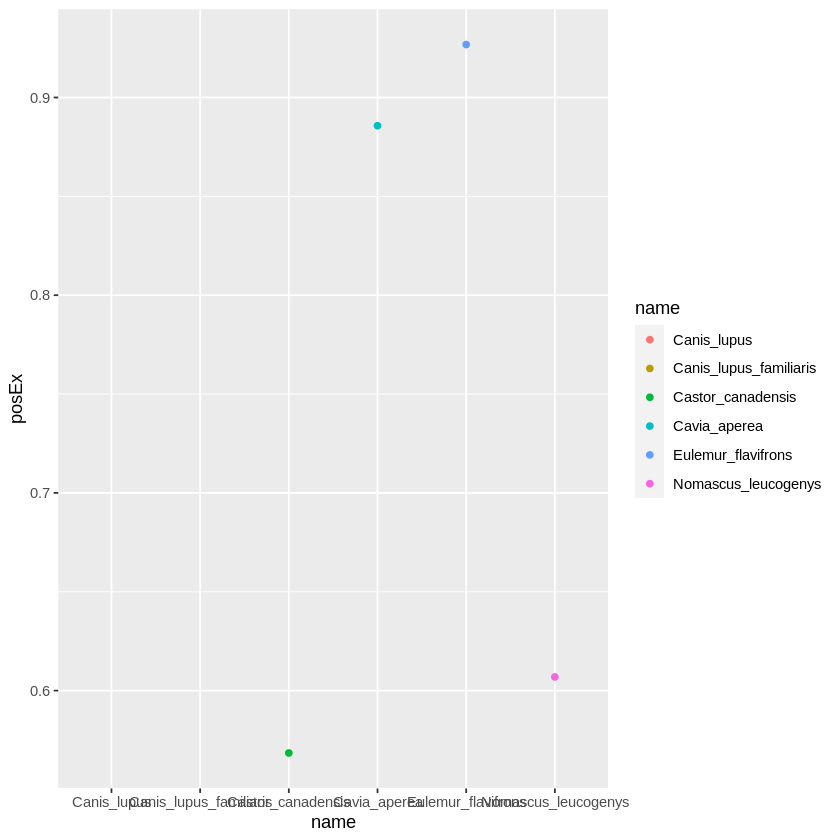

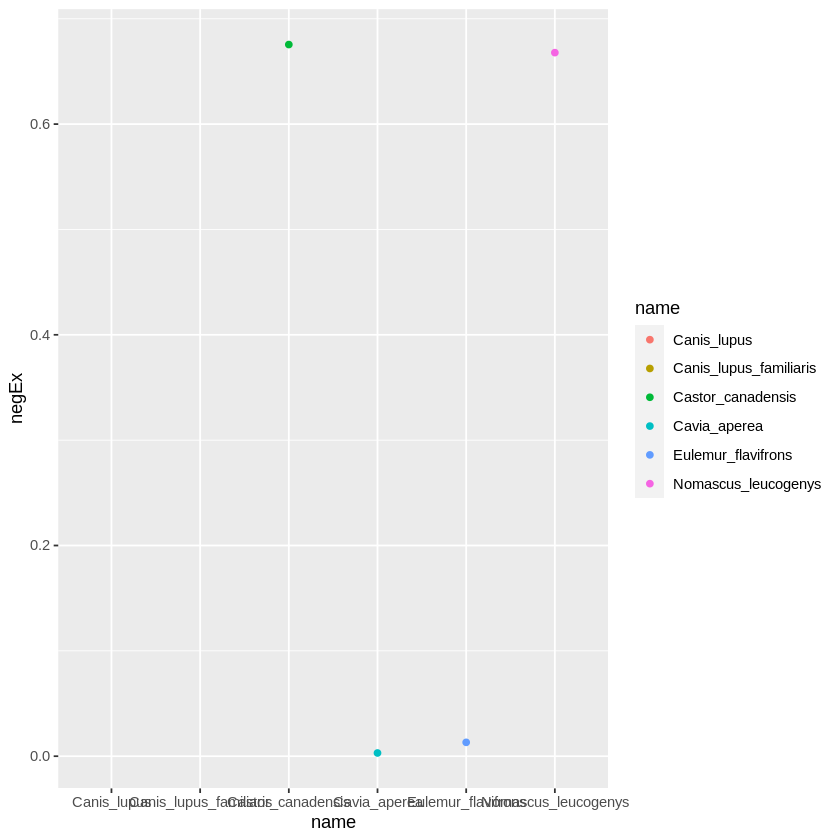

In [ ]:
## Create a barplot or scatterplot to show peaks' association with trait
posEx <- "hg38:chr2:80409766-80410266:250";
negEx <- "hg38:chr2:175679181-175679681:250";

scatterd <- peakPredsubD1[peakPredsubD1$name == posEx | peakPredsubD1$name == negEx, ]
scatterd[1, 2:7]

# scatterdf <- data.frame("name" = all_species, posEx = c(0.66657489, 0.6325209, 0.67517649, 0.182517, 0.1555448, 0.1584083), negEx = c(0.04218201, 0.0487461, 0.02887761, NA, 0.3344273, 0.3451766));
scatterdf <- data.frame("name" = all_species, posEx = as.numeric(scatterd[1, 2:7]), negEx = as.numeric(scatterd[2, 2:7]));
scatterdf

ggplot(scatterdf, aes(x=name, y=posEx, col=name)) + geom_point()
ggplot(scatterdf, aes(x=name, y=negEx, col=name)) + geom_point()

,Canis_lupus_familiaris,Canis_lupus,Eulemur_flavifrons,Nomascus_leucogenys,Cavia_aperea,Castor_canadensis
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
hg38:chr18:37456815-37457315:250,0.02163393,0.04985163,0.01978324,0.0477244,NA,0.0512556


name,posEx,negEx
<chr>,<dbl>,<dbl>
Canis_lupus_familiaris,0.02163393,NA
Canis_lupus,0.04985163,NA
Eulemur_flavifrons,0.01978324,0.04944745
Nomascus_leucogenys,0.04772440,0.01032770
Cavia_aperea,NA,0.04677778
Castor_canadensis,0.05125560,0.01517778


Warning message:
“Removed 1 rows containing missing values (geom_point).”
Warning message:
“Removed 2 rows containing missing values (geom_point).”


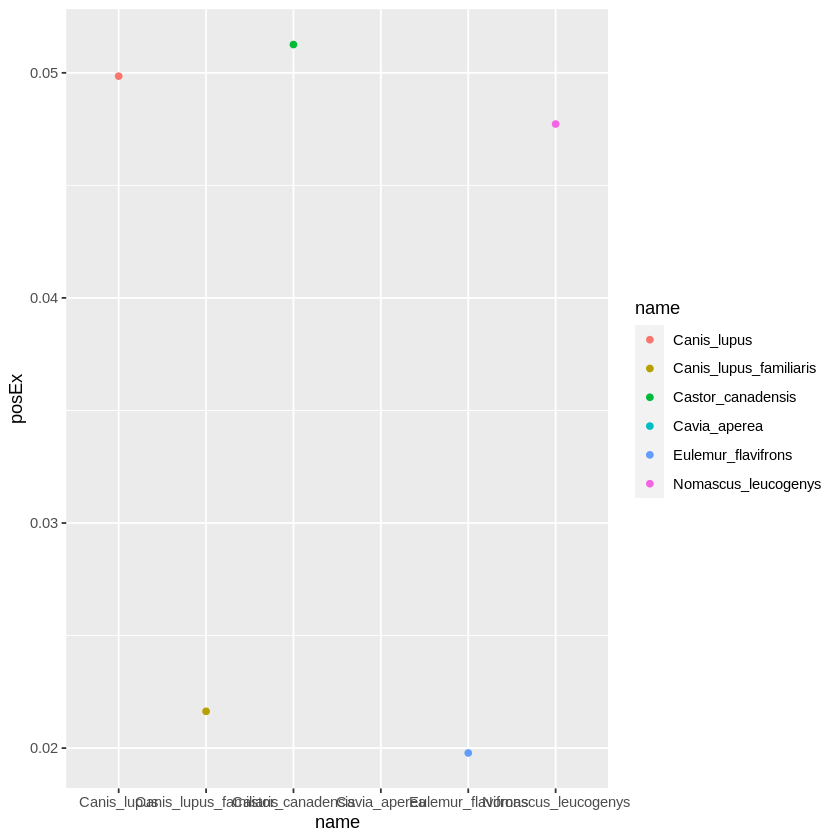

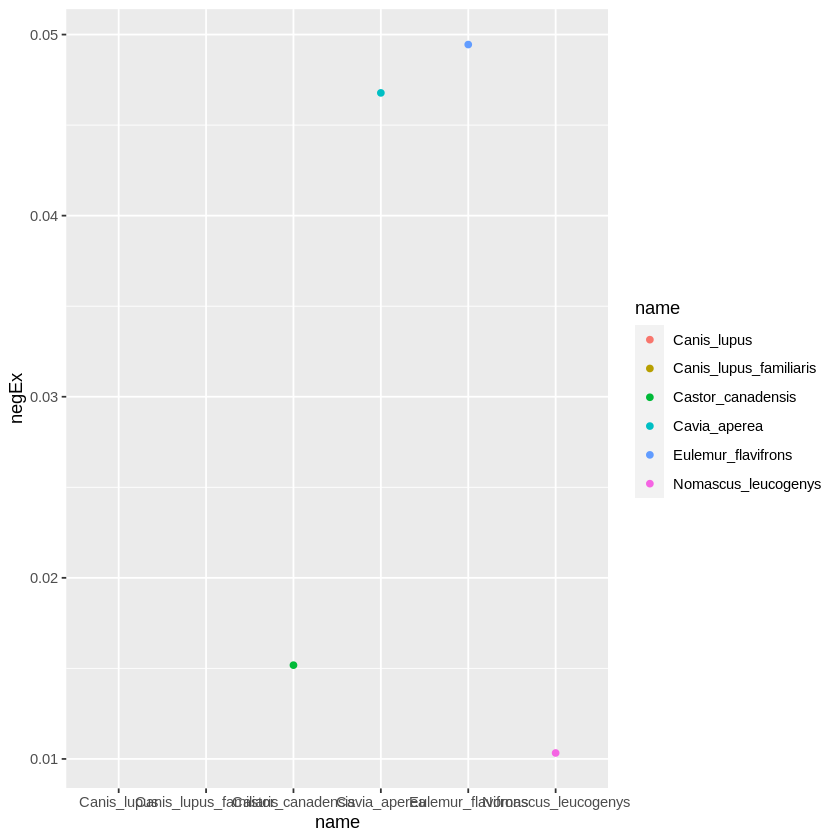

In [ ]:
## Create a barplot or scatterplot to show peaks' association with trait
posEx <- "hg38:chr18:37456815-37457315:250";
negEx <- "hg38:chr1:68015487-68015987:250";

scatterd2 <- peakPredsubD2[peakPredsubD2$name == posEx | peakPredsubD2$name == negEx, ]
scatterd2[1, 2:7]

# scatterdf <- data.frame("name" = all_species, posEx = c(0.66657489, 0.6325209, 0.67517649, 0.182517, 0.1555448, 0.1584083), negEx = c(0.04218201, 0.0487461, 0.02887761, NA, 0.3344273, 0.3451766));
scatterdf2 <- data.frame("name" = all_species, posEx = as.numeric(scatterd2[1, 2:7]), negEx = as.numeric(scatterd2[2, 2:7]));
scatterdf2

ggplot(scatterdf2, aes(x=name, y=posEx, col=name)) + geom_point()
ggplot(scatterdf2, aes(x=name, y=negEx, col=name)) + geom_point()

In [ ]:
## Visualize peaks in the UCSC genome browser to find nearby genes
## Perform a PubMed search for one of them
## Does the gene relate to our trait (social monogamy)?
## IN PDF DOC

In [ ]:
# making bed dataframe pos 200
hgPeakPosD1 <- diffResultsSortD1_unadj[which(diffResultsSortD1_unadj$meanDiff > 0),"id"]
hgPeakPosD1[1]

hgPeakPosD1df <- data.frame()
hgPeakPosD1df

for (name in hgPeakPosD1){
  splitted = strsplit(name, ":");
  start_stop = strsplit(splitted[[1]][3], "-")
  vec  = c(splitted[[1]][2], start_stop[[1]][1], start_stop[[1]][2], name)
  hgPeakPosD1df = rbind(hgPeakPosD1df, vec);
}

hgPeakPosD1df[1:6, ]

[1] "hg38:chr2:80409766-80410266:250"

<0 x 0 matrix>

,X.chr2.,X.80409766.,X.80410266.,X.hg38.chr2.80409766.80410266.250.
,<chr>,<chr>,<chr>,<chr>
1,chr2,80409766,80410266,hg38:chr2:80409766-80410266:250
2,chr4,100357450,100357950,hg38:chr4:100357450-100357950:250
3,chr9,88813536,88814036,hg38:chr9:88813536-88814036:250
4,chr11,131796444,131796944,hg38:chr11:131796444-131796944:250
5,chr2,223784273,223784773,hg38:chr2:223784273-223784773:250
6,chr19,5247907,5248407,hg38:chr19:5247907-5248407:250


In [ ]:
# making bed dataframe pos 200
hgPeakPosD2 <- diffResultsSortD2_unadj[which(diffResultsSortD2_unadj$meanDiff > 0),"id"]
hgPeakPosD2[1]

hgPeakPosD2df <- data.frame()
hgPeakPosD2df

for (name in hgPeakPosD2){
  splitted = strsplit(name, ":");
  start_stop = strsplit(splitted[[1]][3], "-")
  vec  = c(splitted[[1]][2], start_stop[[1]][1], start_stop[[1]][2], name)
  hgPeakPosD2df = rbind(hgPeakPosD2df, vec);
}

hgPeakPosD2df[1:6, ]

[1] "hg38:chr18:37456815-37457315:250"

<0 x 0 matrix>

,X.chr18.,X.37456815.,X.37457315.,X.hg38.chr18.37456815.37457315.250.
,<chr>,<chr>,<chr>,<chr>
1,chr18,37456815,37457315,hg38:chr18:37456815-37457315:250
2,chr18,7721492,7721992,hg38:chr18:7721492-7721992:250
3,chr6,150310468,150310968,hg38:chr6:150310468-150310968:250
4,chr4,100357446,100357946,hg38:chr4:100357446-100357946:250
5,chr7,111635557,111636057,hg38:chr7:111635557-111636057:250
6,chrX,46691265,46691765,hg38:chrX:46691265-46691765:250


In [ ]:
# make bed dataframe neg 200
hgPeakNegD1 <- diffResultsSortD1_unadj[which(diffResultsSortD1_unadj$meanDiff < 0),"id"]
hgPeakNegD1[1]

hgPeakNegD1df <- data.frame()
hgPeakNegD1df

for (name in hgPeakNegD1){
  splitted = strsplit(name, ":");
  start_stop = strsplit(splitted[[1]][3], "-")
  vec  = c(splitted[[1]][2], start_stop[[1]][1], start_stop[[1]][2], name)
  hgPeakNegD1df = rbind(hgPeakNegD1df, vec);
}

hgPeakNegD1df[1:6, ]

[1] "hg38:chr2:175679181-175679681:250"

<0 x 0 matrix>

,X.chr2.,X.175679181.,X.175679681.,X.hg38.chr2.175679181.175679681.250.
,<chr>,<chr>,<chr>,<chr>
1,chr2,175679181,175679681,hg38:chr2:175679181-175679681:250
2,chr3,192445684,192446184,hg38:chr3:192445684-192446184:250
3,chr4,183738120,183738620,hg38:chr4:183738120-183738620:250
4,chr10,26090777,26091277,hg38:chr10:26090777-26091277:250
5,chr7,43697681,43698181,hg38:chr7:43697681-43698181:250
6,chr5,82045401,82045901,hg38:chr5:82045401-82045901:250


In [ ]:
# make bed dataframe neg 200
hgPeakNegD2 <- diffResultsSortD2_unadj[which(diffResultsSortD2_unadj$meanDiff < 0),"id"]
hgPeakNegD2[1]

hgPeakNegD2df <- data.frame()
hgPeakNegD2df

for (name in hgPeakNegD2){
  splitted = strsplit(name, ":");
  start_stop = strsplit(splitted[[1]][3], "-")
  vec  = c(splitted[[1]][2], start_stop[[1]][1], start_stop[[1]][2], name)
  hgPeakNegD2df = rbind(hgPeakNegD2df, vec);
}

hgPeakNegD2df[1:6, ]

[1] "hg38:chr1:68015487-68015987:250"

<0 x 0 matrix>

,X.chr1.,X.68015487.,X.68015987.,X.hg38.chr1.68015487.68015987.250.
,<chr>,<chr>,<chr>,<chr>
1,chr1,68015487,68015987,hg38:chr1:68015487-68015987:250
2,chr9,125910287,125910787,hg38:chr9:125910287-125910787:250
3,chr3,173638020,173638520,hg38:chr3:173638020-173638520:250
4,chr9,19576131,19576631,hg38:chr9:19576131-19576631:250
5,chr9,90311768,90312268,hg38:chr9:90311768-90312268:250
6,chr5,115435932,115436432,hg38:chr5:115435932-115436432:250


In [ ]:
# make bed data frame for all
hgPeakD1 <- diffResultsSortD1_unadj[,"id"]
hgPeakD1[1]

hgPeakD1df <- data.frame()
hgPeakD1df

for (name in hgPeakD1){
  splitted = strsplit(name, ":");
  start_stop = strsplit(splitted[[1]][3], "-")
  vec  = c(splitted[[1]][2], start_stop[[1]][1], start_stop[[1]][2], name)
  hgPeakD1df = rbind(hgPeakD1df, vec);
}

hgPeakD1df[1:6, ]

[1] "hg38:chr2:80409766-80410266:250"

<0 x 0 matrix>

,X.chr2.,X.80409766.,X.80410266.,X.hg38.chr2.80409766.80410266.250.
,<chr>,<chr>,<chr>,<chr>
1,chr2,80409766,80410266,hg38:chr2:80409766-80410266:250
2,chr4,100357450,100357950,hg38:chr4:100357450-100357950:250
3,chr9,88813536,88814036,hg38:chr9:88813536-88814036:250
4,chr11,131796444,131796944,hg38:chr11:131796444-131796944:250
5,chr2,223784273,223784773,hg38:chr2:223784273-223784773:250
6,chr19,5247907,5248407,hg38:chr19:5247907-5248407:250


In [ ]:
# make bed data frame for all
hgPeakD2 <- diffResultsSortD2_unadj[,"id"]
hgPeakD2[1]

hgPeakD2df <- data.frame()
hgPeakD2df

for (name in hgPeakD2){
  splitted = strsplit(name, ":");
  start_stop = strsplit(splitted[[1]][3], "-")
  vec  = c(splitted[[1]][2], start_stop[[1]][1], start_stop[[1]][2], name)
  hgPeakD2df = rbind(hgPeakD2df, vec);
}

hgPeakD2df[1:6, ]

[1] "hg38:chr18:37456815-37457315:250"

<0 x 0 matrix>

,X.chr18.,X.37456815.,X.37457315.,X.hg38.chr18.37456815.37457315.250.
,<chr>,<chr>,<chr>,<chr>
1,chr18,37456815,37457315,hg38:chr18:37456815-37457315:250
2,chr18,7721492,7721992,hg38:chr18:7721492-7721992:250
3,chr6,150310468,150310968,hg38:chr6:150310468-150310968:250
4,chr4,100357446,100357946,hg38:chr4:100357446-100357946:250
5,chr7,111635557,111636057,hg38:chr7:111635557-111636057:250
6,chrX,46691265,46691765,hg38:chrX:46691265-46691765:250


In [ ]:
## Print out BED files for top 200 positively and negatively associated peaks
# hgPeakPosD1 <- diffResultsSortD1_unadj[which(diffResultsSortD1_unadj$meanDiff > 0),"id"]
# hgPeakNegD1 <- diffResultsSortD1_unadj[which(diffResultsSortD1_unadj$meanDiff < 0),"id"]
write.table(hgPeakPosD1df[1:200, ],row.names=F,col.names=F,quote=F,sep="\t",file="hgIncPeak.projanalysis.2.bed")
write.table(hgPeakNegD1df[1:200, ],row.names=F,col.names=F,quote=F,sep="\t",file="hgDecPeak.projanalysis.2.bed")
write.table(hgPeakD1df,row.names=F,col.names=F,quote=F,sep="\t",file="hgPeak.projanalysis.2.bed")

In [ ]:
write.table(hgPeakPosD2df[1:200, ],row.names=F,col.names=F,quote=F,sep="\t",file="hgIncPeakD2.projanalysis.2.bed")
write.table(hgPeakNegD2df[1:200, ],row.names=F,col.names=F,quote=F,sep="\t",file="hgDecPeakD2.projanalysis.2.bed")
write.table(hgPeakD2df,row.names=F,col.names=F,quote=F,sep="\t",file="hgPeakD2.projanalysis.2.bed")

In [ ]:
## GREAT gene ontology analysis
## IN PDF DOC
